# Costas Loop



## Initialization of variables

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Initializations

phi_hat = 0.3      # phi_hat is the output phase 
freq_offset = 0.3
delta_phi = 0.0    # delta_phi is the phase difference between the incomming signal and the VCO
wn = 0.01          # wn is omega_n, pll bandwidth
zeta = 0.707       # Damping factor of the loop
K = 1000           # K = loop gain, which I assume can be chosen, but this is a sample value

# These are just initializing some vectors for plotting
ref = np.linspace(0, 400, 400)
output = []


# The ax, tx, and bx variables are for the loop parameters. Using feedback theory I derived (ok, I stole)
# an equation in the form (a0*z^-1 + a1*z^-1 + a2*z^-1)/(b0*z^-1 + b1*z^-1 + b2*z^-1). tx are just other
# ways of expressing the variables wn, zeta, and K
a0 = 1.0
a1 = -2.0
a2 = 1.0

t1 = K/(wn*wn)     # tau_1
t2 = 2*zeta/wn     # tau_2

b0 = (4*K/t1) * (1.0+t2/2.0)
b1 = 8*K/t1
b2 = (4*K/t1) * (1.0-t2/2.0)


# In order for the filter desing to work a buffer is needed to cycle values through
v0 = 0.0           # Buffer for the filter values
v1 = 0.0           # Buffer for the filter values
v2 = 0.0           # Buffer for the filter values

## Main portion of the code

In [23]:
# Main portion of the code

# pll = Costas_Loop()

phi = 0.0              # Original signal phase
for i in range(len(ref)):
    # signal_in[i] = np.exp(1j * phi) # Complex input signal
    signal_in = np.cos(phi) + 1j*np.sin(phi)
    phi += freq_offset
    
    # vco = np.exp(1j * phi_hat) # Complex oscillator signal
    vco = np.cos(phi_hat) + 1j*np.sin(phi_hat)
    
    delta_phi = np.angle( signal_in * np.conj( vco))
    # ref.append(signal_in)
    output.append(vco)
    
    # vx varibles are a buffer to store output changes on transfer function variables ax and bx
    v2 =  v1
    v1 =  v0
    v0 =  delta_phi - v1* a1 - v2* a2
    phi_hat =  v0 * b0 + v1 * b1 + v2* b2
    print(phi_hat)


-0.008604
-0.00859723728
0.0174749774052
0.0607410080082
0.120419315544
0.195970606674
0.286866584656
0.392583743021
0.512603766883
0.646414088096
0.793508405005
0.953387162609
1.12555799444
1.30953612759
1.50484475231
1.7110153575
1.92758803368
1.97390998986
1.84968094241
1.74011997542
1.65024013681
1.57972332329
1.52808930116
1.49484949774
1.47951252904
1.48158529464
1.50057389148
1.53598447368
1.58732406359
1.65410131538
1.73582723283
1.8320158426
1.94218482439
2.0658560995
2.20255637902
2.35181767312
2.51317776282
2.6861806355
2.87037688557
3.0653240816
3.27058710108
3.48573843432
3.71035845848
3.94403568319
4.1863669688
4.43695771853
4.69542204567
4.96138291697
5.05427051866
4.97386750283
4.90547571334
4.85419065547
4.81977626203
4.80183380277
4.79995557154
4.81373031667
4.8427442453
4.88658185307
4.94482670614
5.01706218038
5.102872159
5.20184168994
5.31355760409
5.43760909561
5.57358826553
5.72109062972
5.87971559265
6.04906688774
6.22875298578
6.41838747243
6.61758939582
6.8259

In [15]:
print(output)

[(0.95533648912560598+0.29552020666133955j), (0.99996298582034382-0.0086038938430707899j), (0.99985206236575308-0.017200389034850855j), (0.99985661884773636-0.016933450515841761j), (0.99986539627655724-0.016406990239622526j), (0.99987396875931078-0.015875975481993335j), (0.99988220307543418-0.015348614693714794j), (0.9998900920885373-0.014825779681909054j), (0.99989763414721922-0.014308082568733961j), (0.99990482947145631-0.013796086389184357j), (0.9999116798931863-0.01329031275727326j), (0.99991818869806759-0.01279124351951846j), (0.99992436047587296-0.012299322213700637j), (0.9999302009772737-0.011814955503471681j), (0.99993571697726313-0.011338514592602204j), (0.99994091614545666-0.010870336617829096j), (0.9999458069234316-0.010410726019218818j), (0.99995039840920508-0.0099599558870545699j), (0.99995470024888156-0.0095182692843489933j), (0.99995872253545393-0.0090858805441741963j), (0.99996247571468833-0.0086629765410867095j), (0.99996597049798464-0.0082497179360085417j), (0.9999692

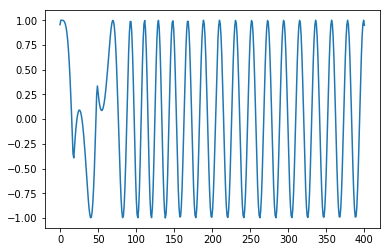

In [27]:
plt.plot(ref, np.real(output))
plt.show()

In [19]:
print(signal_in)

(1+0j)
